# Trading Volume Analysis

In [1]:
import glob
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from typing import List, Dict, Union

In [2]:
BAR_SIZE = 60000 # 1 minute
TIME_BAR_DIR = f'/data/bars/TimeBar/{BAR_SIZE}' # 1-minute time bars

## Market Shares

In [3]:
from utils import read_bars

def get_total_volume()->pd.DataFrame:
    csv_files = glob.glob(f'{TIME_BAR_DIR}/TimeBar.{BAR_SIZE}.*.csv')
    
    volumes: List[Dict] = []
    for csv_file in csv_files:
        _,_,exchange,market_type,pair,_ = os.path.basename(csv_file).split('.')
        bars_df = read_bars(csv_file)
        volumes.append({'exchange': exchange, 'market_type': market_type, 'pair': pair, 
                        'coin': pair.split('_')[0],'volume_usd': bars_df['volume_quote'].sum()})
        del bars_df
    return pd.DataFrame(volumes).sort_values('volume_usd', ascending=False).reset_index(drop=True)

In [4]:
volumes_sum_df = get_total_volume()

In [5]:
volumes_sum_df

,exchange,market_type,pair,coin,volume_usd
0,Huobi,Swap,BTC_USD,BTC,1.634068e+11
1,Binance,Swap,BTC_USDT,BTC,1.572284e+11
2,BitMEX,Swap,BTC_USD,BTC,9.656688e+10
3,OKEx,Spot,BTC_USDT,BTC,3.845596e+10
4,Huobi,Swap,ETH_USD,ETH,3.558559e+10
...,...,...,...,...,...
250,Kraken,Spot,LTC_USDT,LTC,3.359254e+05
251,OKEx,Swap,IOTA_USDT,IOTA,3.355797e+05
252,Bitfinex,Spot,QTUM_USD,QTUM,2.667435e+05
253,Bitfinex,Spot,ATOM_USD,ATOM,1.756332e+05


In [6]:
def plot_market_shares(groupby: Union[str, List[str]]=None, chart: Union['pie', 'bar'] = 'pie')->None:
    agg_df = volumes_sum_df.groupby(groupby).agg({'volume_usd': 'sum'}).sort_values('volume_usd', ascending=False)
    if chart == 'pie':
        agg_df.plot.pie(y='volume_usd', autopct='%1.1f%%', figsize=(8, 8))
    else:
        agg_df.plot.bar(y='volume_usd', figsize=(9, 6))

### Between different market types

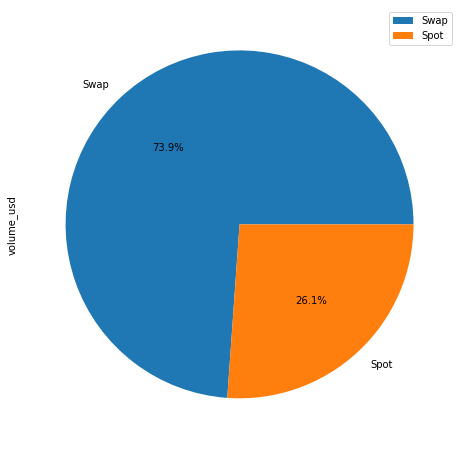

In [7]:
plot_market_shares(groupby='market_type')

### Between different exchanges

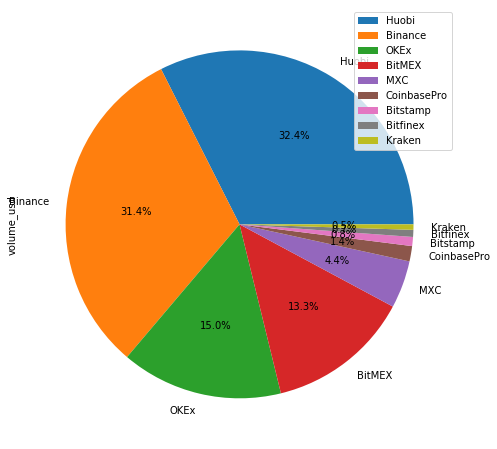

In [8]:
plot_market_shares(groupby='exchange')

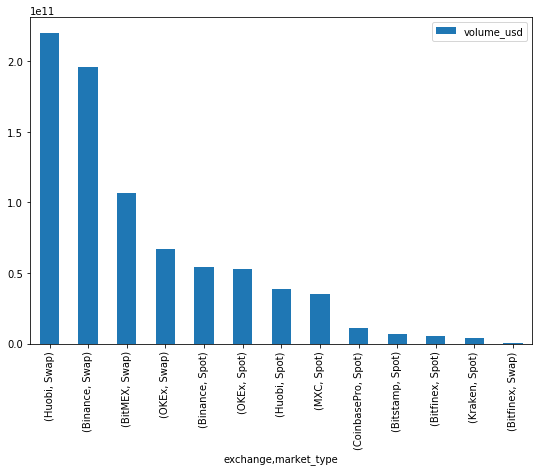

In [9]:
plot_market_shares(groupby=['exchange', 'market_type'], chart='bar')

In [10]:
agg_df = volumes_sum_df[volumes_sum_df['coin']=='BTC'].groupby(['exchange', 'market_type']).agg({'volume_usd': 'sum'}).sort_values('volume_usd', ascending=False)

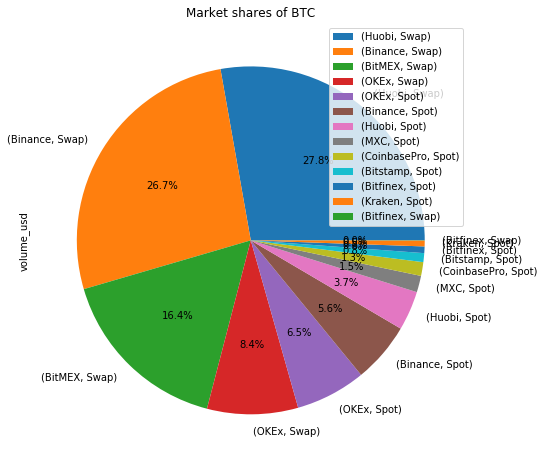

In [11]:
agg_df.plot.pie(y='volume_usd', autopct='%1.1f%%', figsize=(8, 8), title='Market shares of BTC')

### Between different cryptocurrencies

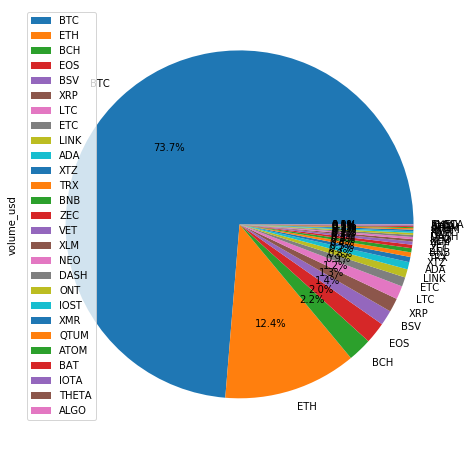

In [12]:
plot_market_shares(groupby='coin')

## Volume Correlations

In [13]:
def read_volumes(csv_file: str)->pd.Series:
    TIME_BEGIN = pd.to_datetime('2020-06-07T00:00:00.000Z')
    TIME_END = pd.to_datetime('2020-06-30T00:00:00.000Z')
    bars_df = read_bars(csv_file)[['exchange', 'market_type', 'pair', 'timestamp', 'volume', 'volume_quote']]
    bars_df = bars_df[(bars_df['timestamp'] >= TIME_BEGIN) & (bars_df['timestamp'] < TIME_END)]

    filename = os.path.basename(csv_file)[len(f'TimeBar.{BAR_SIZE}.'):-len('.csv')]
    return bars_df['volume_quote'].rename(filename)

In [14]:
def read_volumes_all()->pd.DataFrame:
    # csv_files = glob.glob(f'{TIME_BAR_DIR}/TimeBar.{BAR_SIZE}.*.csv')
    csv_files = glob.glob(f'{TIME_BAR_DIR}/TimeBar.{BAR_SIZE}.Huobi.*.csv') + \
                glob.glob(f'{TIME_BAR_DIR}/TimeBar.{BAR_SIZE}.Binance.*.csv') + \
                glob.glob(f'{TIME_BAR_DIR}/TimeBar.{BAR_SIZE}.OKEx.*.csv') + \
                glob.glob(f'{TIME_BAR_DIR}/TimeBar.{BAR_SIZE}.BitMEX.*.csv')
    csv_files = sorted(csv_files)
    volumes_list = [read_volumes(csv_file) for csv_file in csv_files]
    return pd.concat(volumes_list, axis=1)

In [15]:
volumes_df = read_volumes_all()

In [16]:
volumes_df

,Binance.Spot.ADA_USDT,Binance.Spot.ALGO_USDT,Binance.Spot.ATOM_USDT,Binance.Spot.BAT_USDT,Binance.Spot.BCH_USDT,Binance.Spot.BNB_USDT,Binance.Spot.BTC_USDT,Binance.Spot.DASH_USDT,Binance.Spot.EOS_USDT,Binance.Spot.ETC_USDT,...,OKEx.Swap.XLM_USD,OKEx.Swap.XLM_USDT,OKEx.Swap.XMR_USD,OKEx.Swap.XMR_USDT,OKEx.Swap.XRP_USD,OKEx.Swap.XRP_USDT,OKEx.Swap.XTZ_USD,OKEx.Swap.XTZ_USDT,OKEx.Swap.ZEC_USD,OKEx.Swap.ZEC_USDT
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-07 00:00:00+00:00,5876.02440,NaN,1217.952300,3376.599600,3636.0579,6664.8735,76227.920,NaN,3020.13230,4198.109000,...,NaN,NaN,NaN,NaN,60.000004,1608.44010,NaN,NaN,NaN,NaN
2020-06-07 00:01:00+00:00,3453.98600,NaN,173.810000,1439.024700,5945.7036,26754.9530,238013.170,7091.4424,12335.93000,142.914120,...,NaN,NaN,NaN,NaN,110.000000,NaN,NaN,NaN,100.0,NaN
2020-06-07 00:02:00+00:00,5736.48800,NaN,2914.222000,2129.596000,9100.8100,7480.1450,174685.000,632.6515,197.48842,69.033455,...,NaN,NaN,NaN,NaN,570.000000,733.56995,NaN,NaN,NaN,NaN
2020-06-07 00:03:00+00:00,9997.48500,NaN,407.257720,2263.390900,4868.1160,13474.0700,129115.234,595.1800,7521.88570,7400.357400,...,NaN,NaN,NaN,NaN,6359.999500,3401.71000,NaN,NaN,NaN,NaN
2020-06-07 00:04:00+00:00,552.79596,74.0064,20.001951,96.466515,15391.0820,6223.1090,121448.490,157.8298,16343.98100,8524.889000,...,NaN,NaN,NaN,NaN,1100.000000,203.66000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29 23:55:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1236.33700,NaN,NaN,690.000000,460.95000,140.000020,NaN,NaN,NaN
2020-06-29 23:56:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,566.94300,NaN,NaN,13080.001000,2748.85990,10.000001,NaN,NaN,NaN
2020-06-29 23:57:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
def plot_corrs_in_exchange(exchange: str, market_type: str, width: int=16)->None:
    prefix = f'{exchange}.{market_type}.'
    df = volumes_df.filter(regex=prefix)
    df.columns = [col[len(prefix):] for col in df.columns.values]

    fig, ax = plt.subplots(figsize=(width, width))
    sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center=0, ax=ax).set_title(f'{exchange} {market_type}')

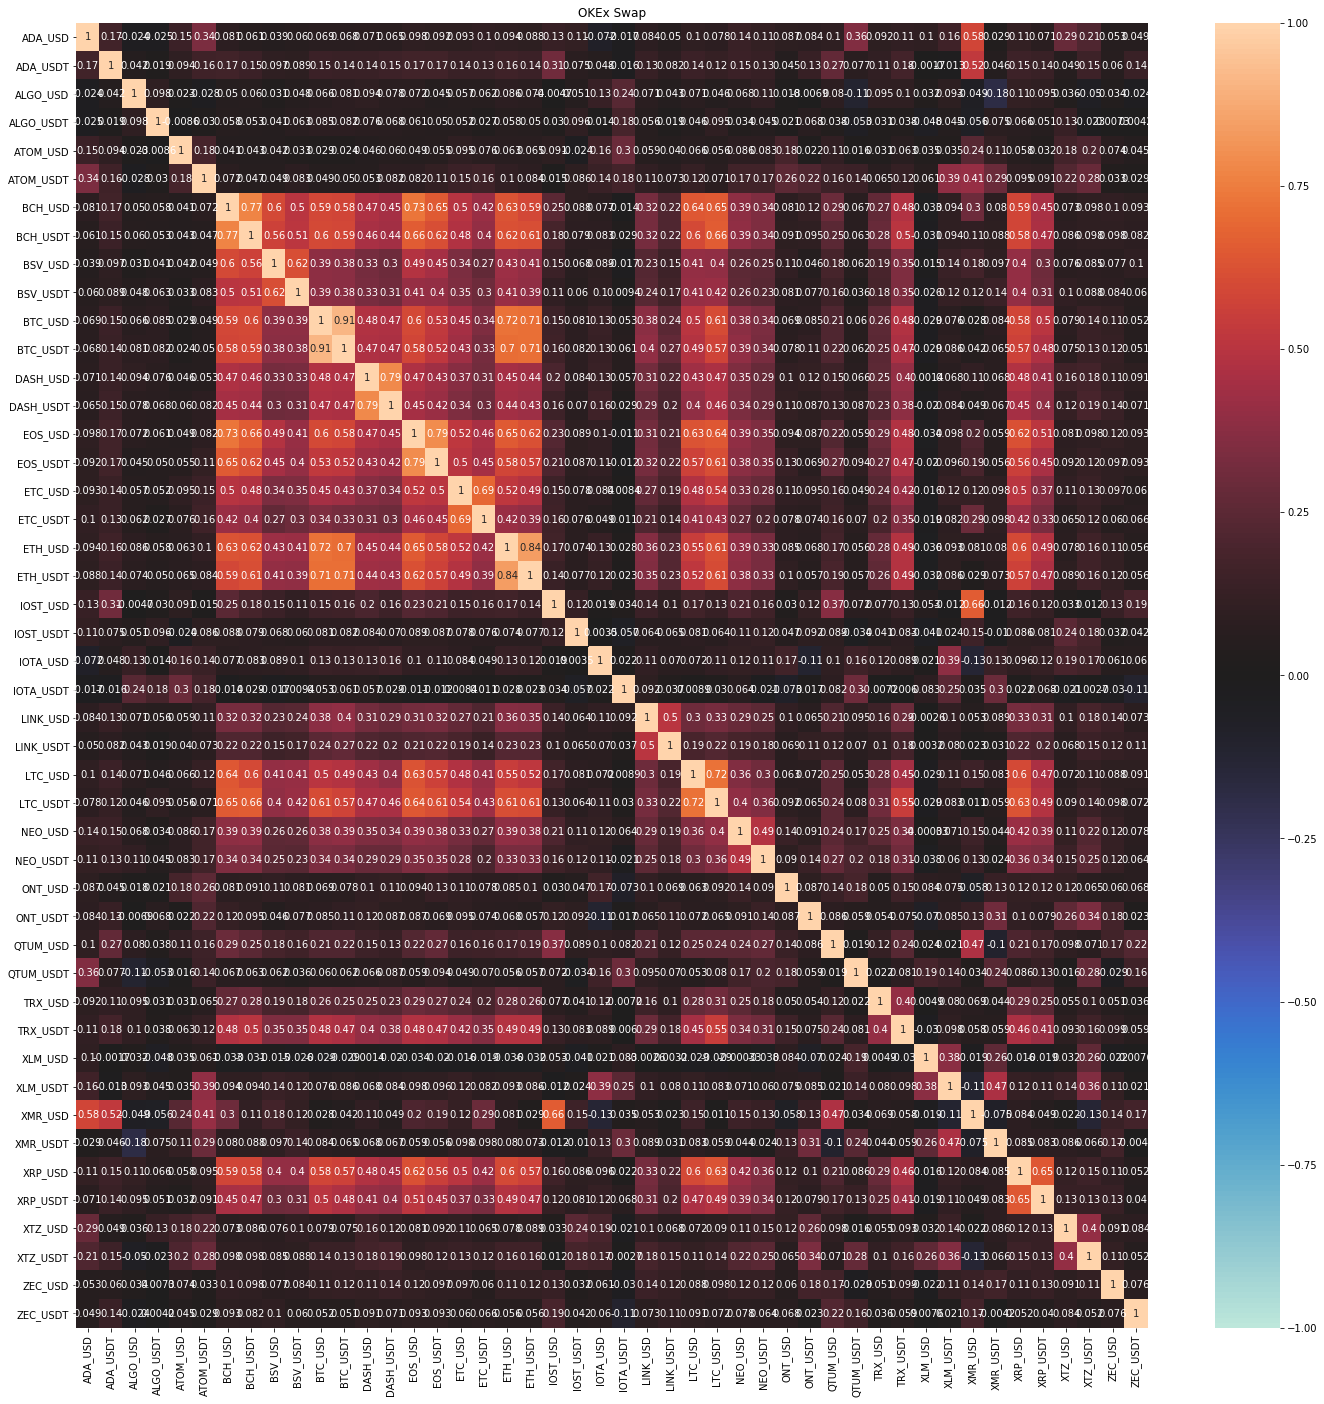

In [18]:
plot_corrs_in_exchange('OKEx', 'Swap', 24)

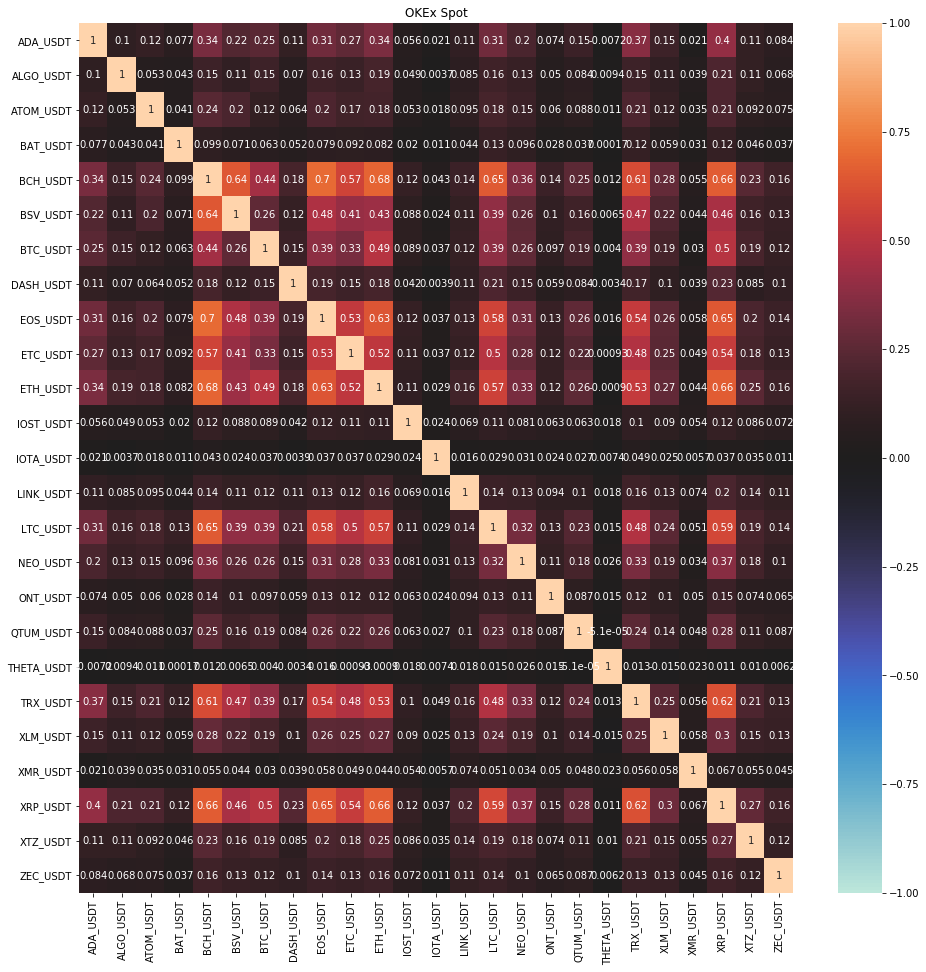

In [19]:
plot_corrs_in_exchange('OKEx', 'Spot')

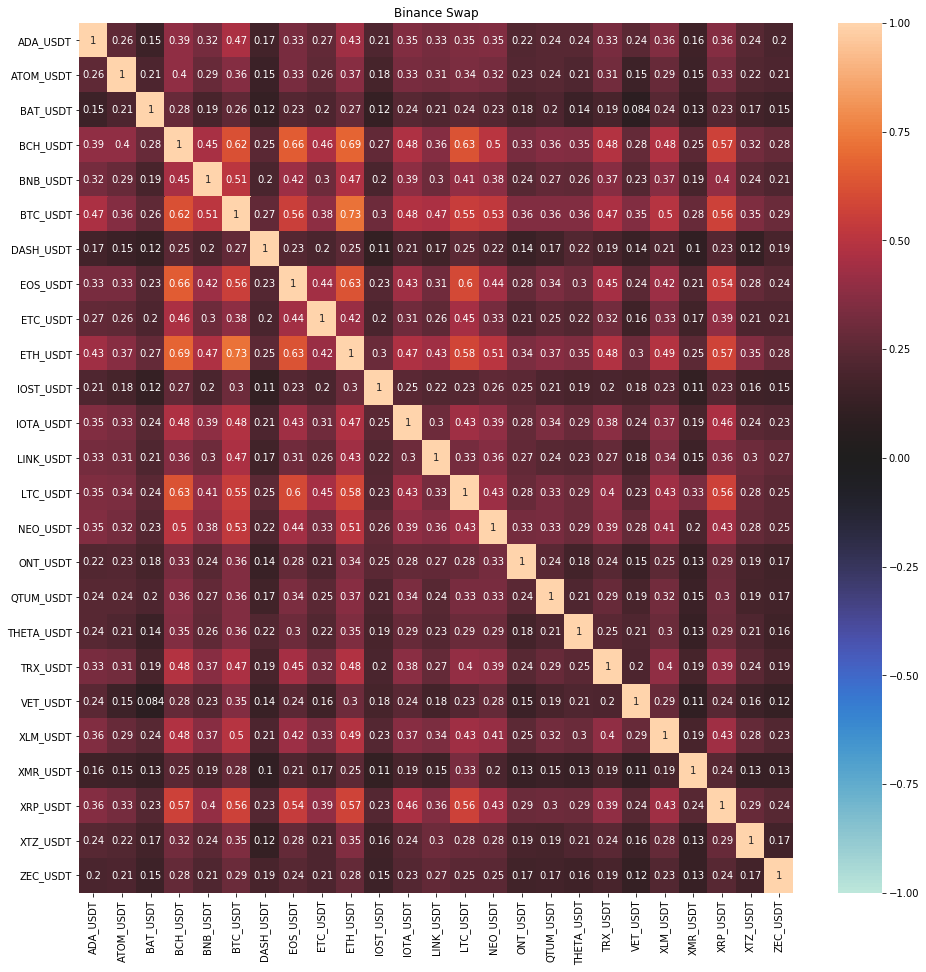

In [20]:
plot_corrs_in_exchange('Binance', 'Swap')

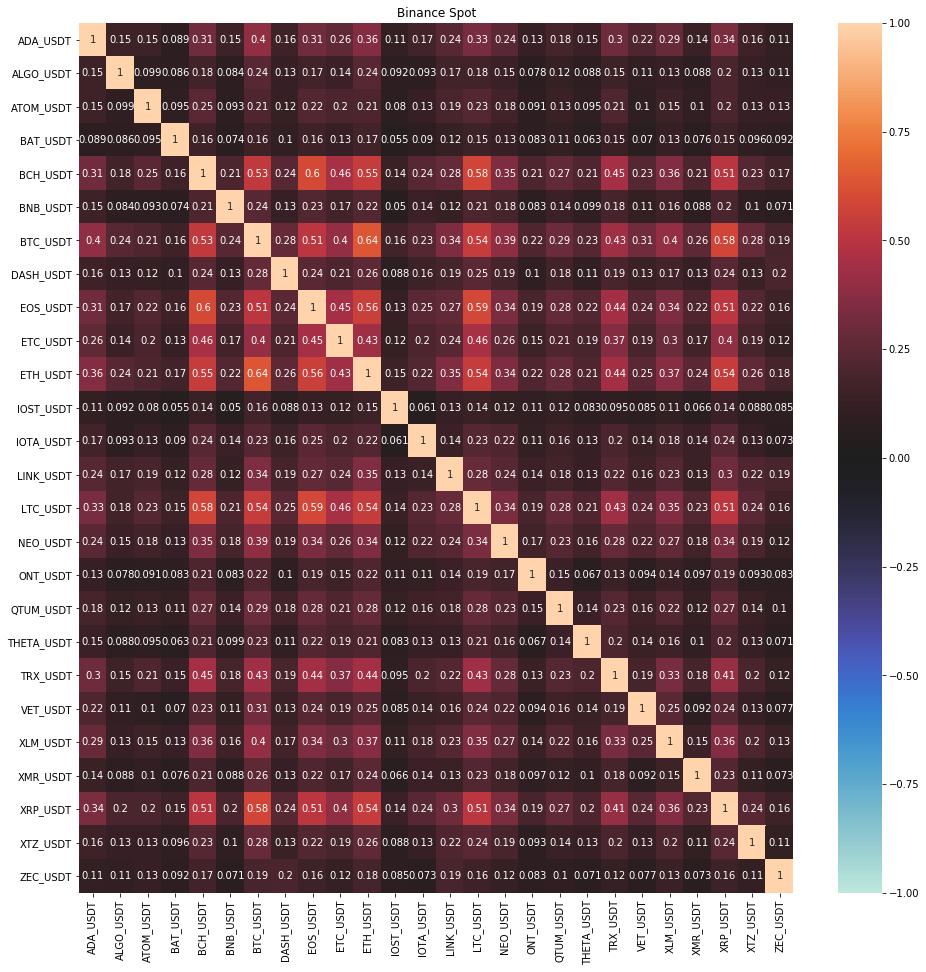

In [21]:
plot_corrs_in_exchange('Binance', 'Spot')

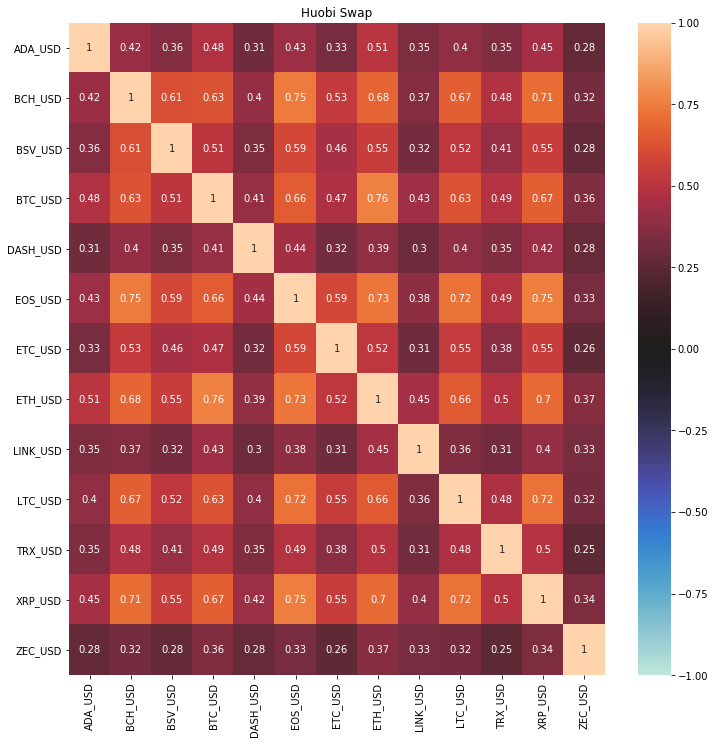

In [22]:
plot_corrs_in_exchange('Huobi', 'Swap', 12)

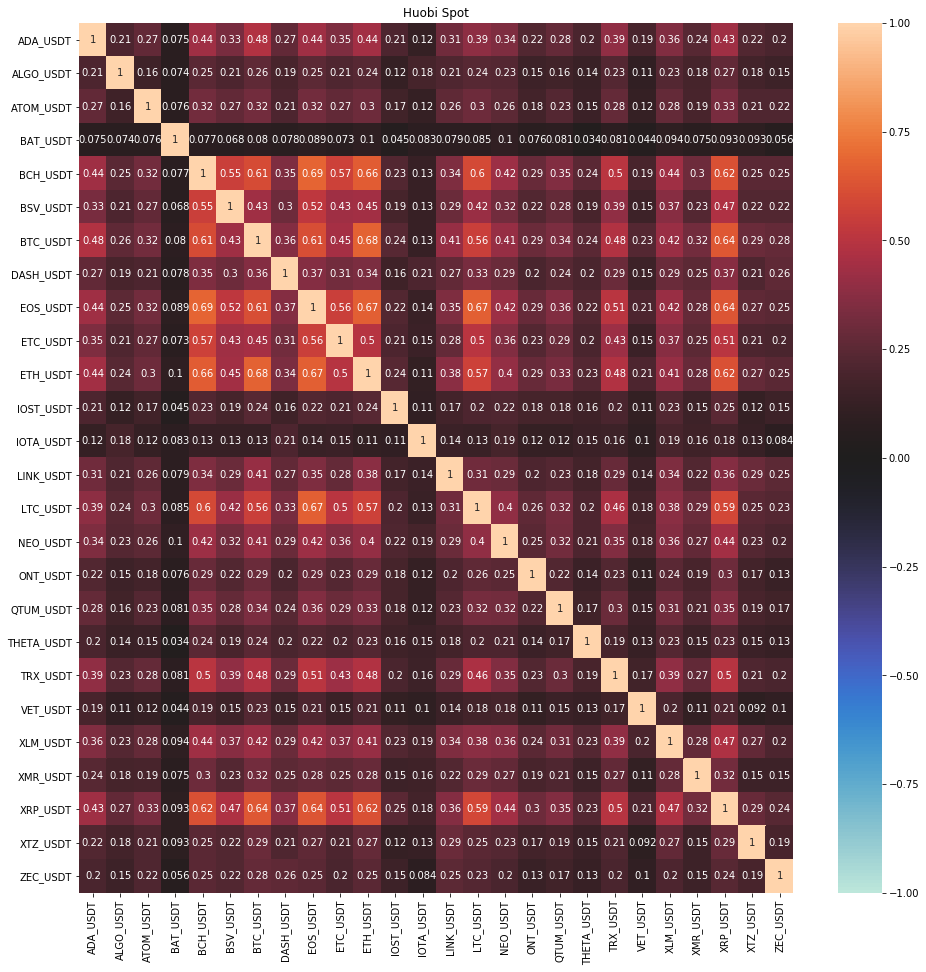

In [23]:
plot_corrs_in_exchange('Huobi', 'Spot')

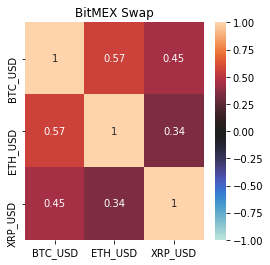

In [24]:
plot_corrs_in_exchange('BitMEX', 'Swap', 4)

## Plot correlations between different exchanges for the same pair

In [25]:
def plot_corrs_cross_exchanges(base: str, width: int=8)->None:
    df = volumes_df.filter(regex=f'{base}_USD')
    #df = volumes_df.filter(regex=f'(Huobi.*{base}_USD)|(Binance.*{base}_USD)|(OKEx.*{base}_USD)|(BitMEX.*{base}_USD)')

    fig, ax = plt.subplots(figsize=(width, width))
    sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center=0, ax=ax).set_title(base)

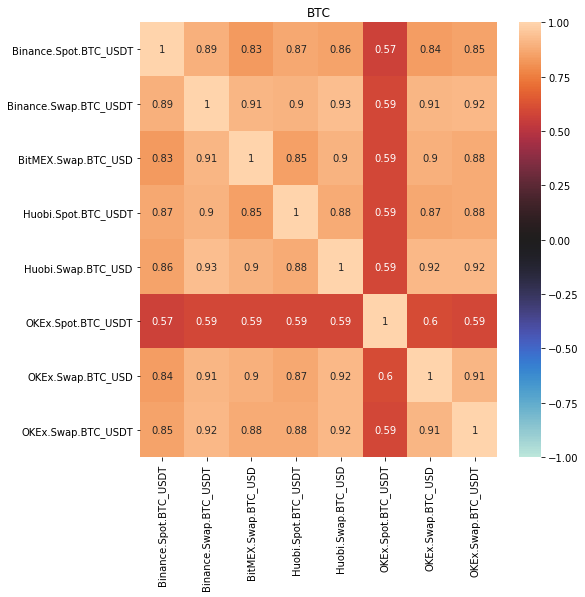

In [26]:
plot_corrs_cross_exchanges('BTC')

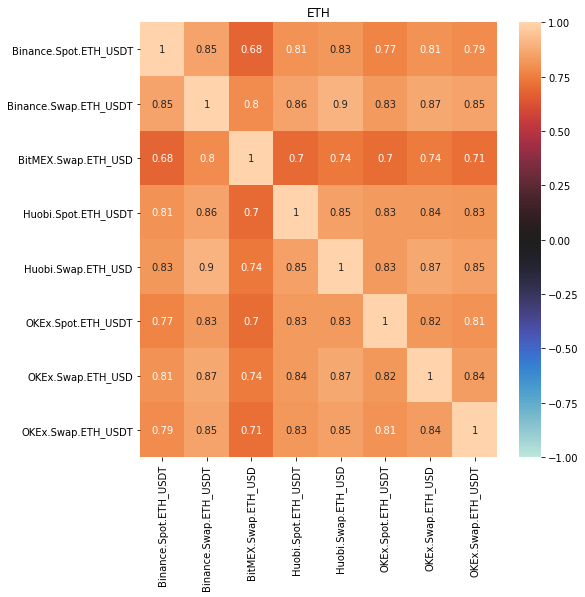

In [27]:
plot_corrs_cross_exchanges('ETH')

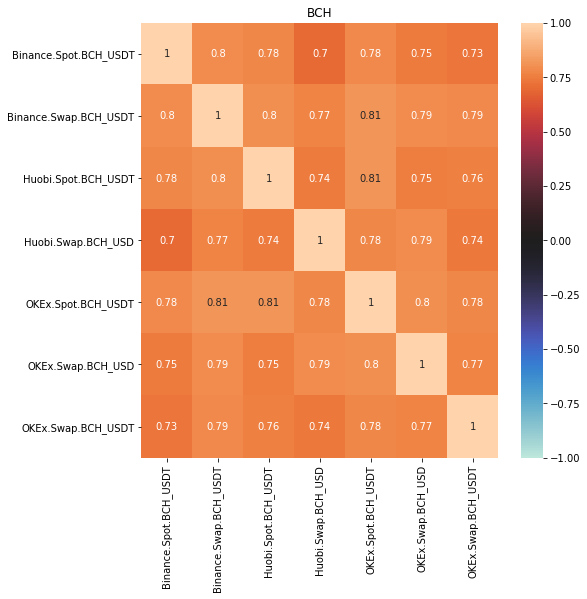

In [28]:
plot_corrs_cross_exchanges('BCH')

We can see that same trading pairs are highly synchronized between different exchanges.

## Sorting by correlations with BTC

In [29]:
volumes_df.corr()['BitMEX.Swap.BTC_USD'].sort_values(ascending=False)[0:20]

BitMEX.Swap.BTC_USD      1.000000
Binance.Swap.BTC_USDT    0.910557
Huobi.Swap.BTC_USD       0.899102
OKEx.Swap.BTC_USD        0.895542
OKEx.Swap.BTC_USDT       0.881406
Huobi.Spot.BTC_USDT      0.851314
Binance.Spot.BTC_USDT    0.834991
Huobi.Swap.ETH_USD       0.701769
Binance.Swap.ETH_USDT    0.698210
OKEx.Spot.ETH_USDT       0.683104
OKEx.Swap.ETH_USD        0.681057
OKEx.Swap.ETH_USDT       0.679256
Huobi.Spot.ETH_USDT      0.653902
Binance.Spot.ETH_USDT    0.643220
Huobi.Spot.XRP_USDT      0.630194
OKEx.Spot.XRP_USDT       0.626035
Binance.Swap.BCH_USDT    0.601353
Binance.Spot.XRP_USDT    0.597675
Huobi.Swap.XRP_USD       0.594333
Huobi.Spot.EOS_USDT      0.593932
Name: BitMEX.Swap.BTC_USD, dtype: float64

## References

* [Seaborn Heatmaps: 13 Ways to Customize Correlation Matrix Visualizations | by Okoh Anita](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07)
* [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)